# 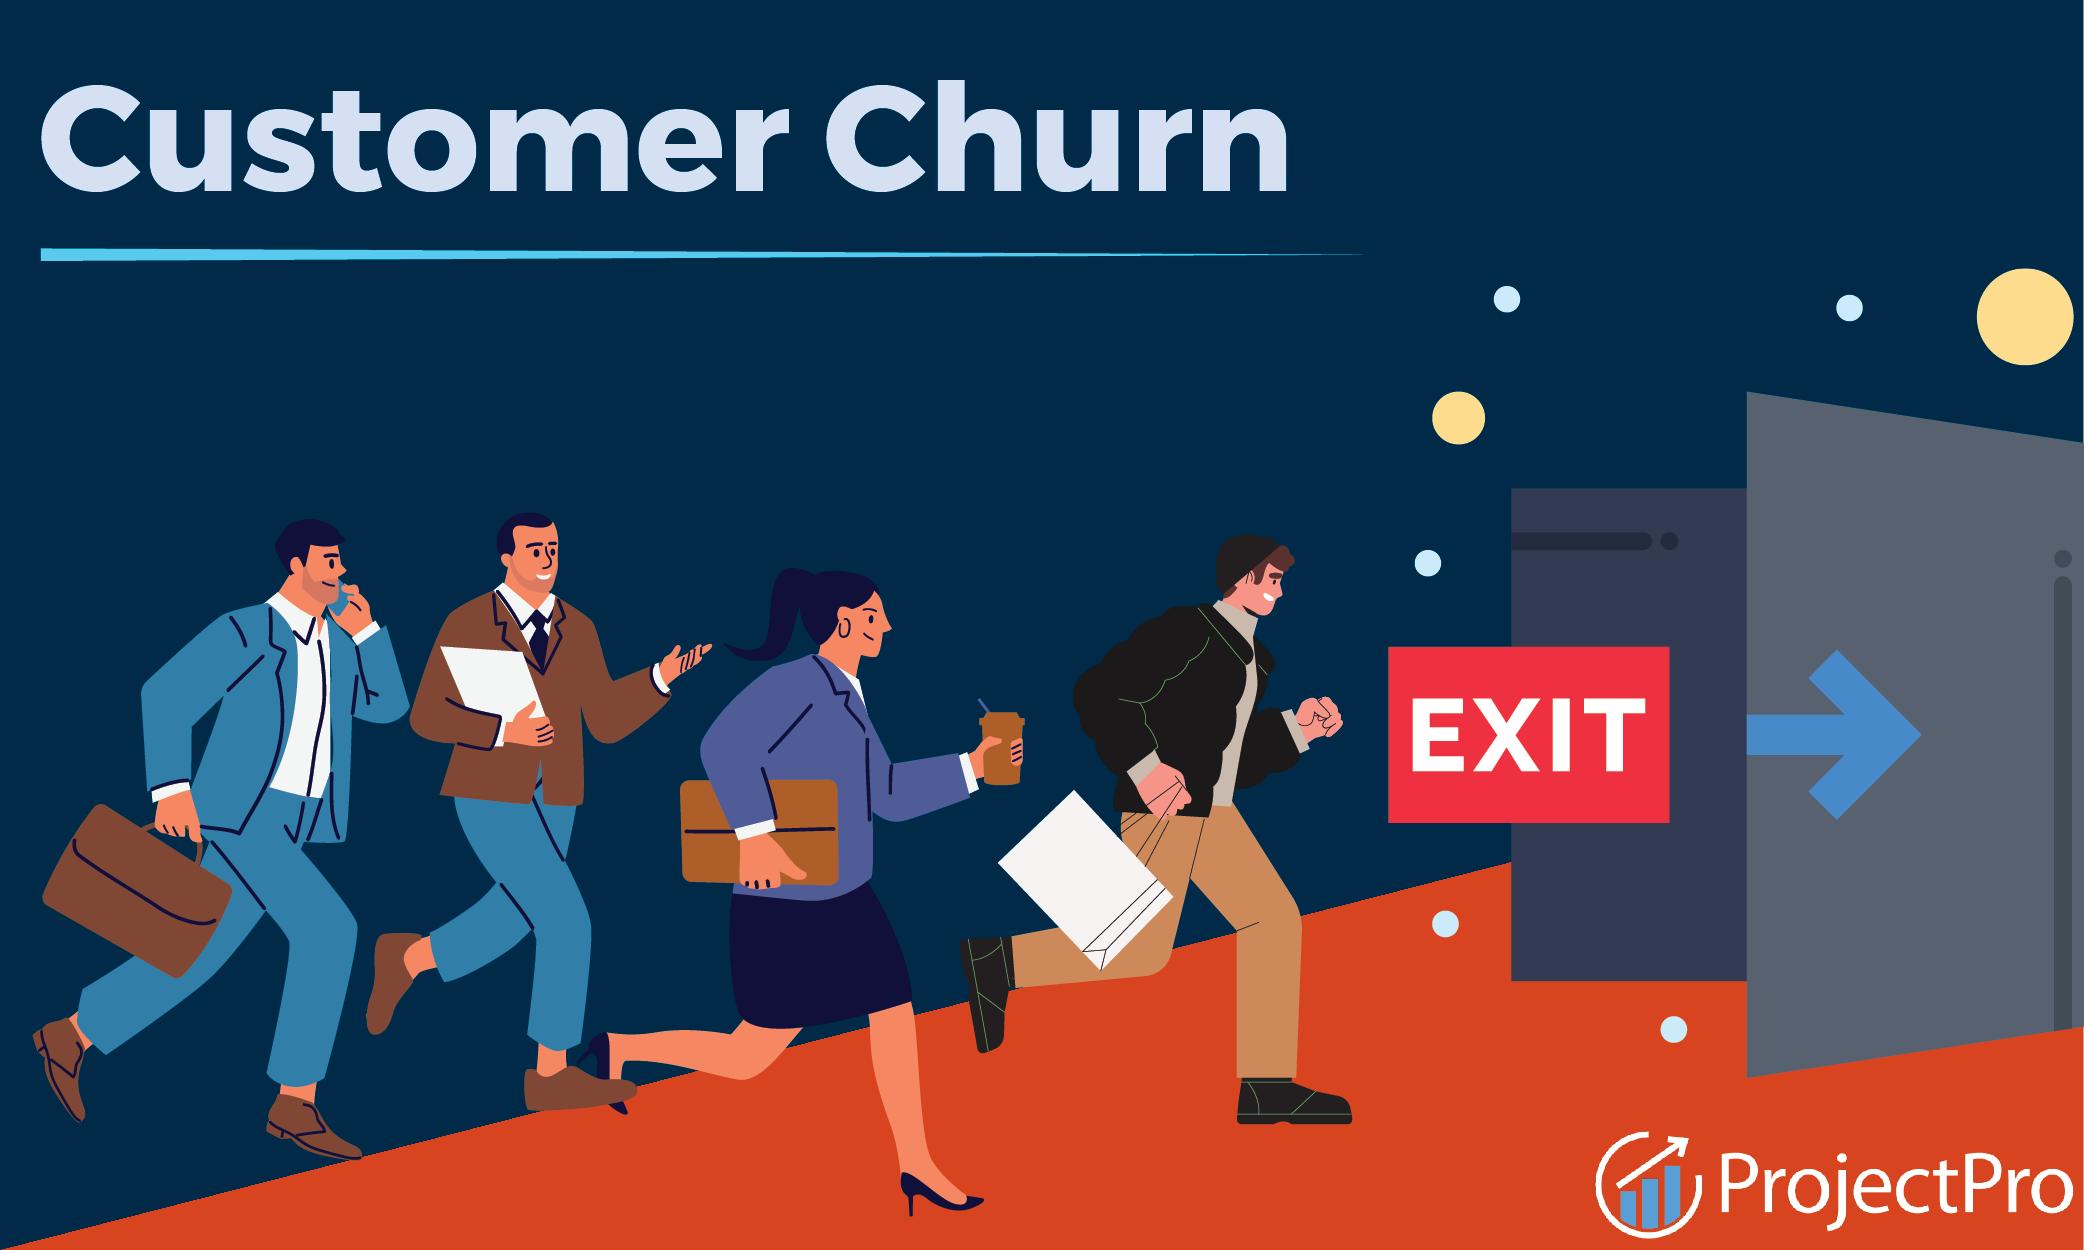

# customer churn prediction using ANN 

In [102]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras 
import numpy as np

In [103]:
df=pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [104]:
df.shape

(10000, 14)

In [105]:
df.size

140000

In [106]:
df.isnull().sum().sum()

0

In [107]:
df.duplicated().sum()

0

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [109]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [110]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [111]:
# data is imbalance 

In [112]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [113]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [114]:
# remove unwanted columns 
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [115]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [116]:
# encoding 
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [117]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [118]:
# sep x and y 
X=df.drop('Exited',axis=1)
y=df['Exited']

In [119]:
# train_test_split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=11,test_size=0.2)

In [120]:
# scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.fit_transform(X_test)

In [121]:
X_train_sc.shape

(8000, 11)

In [122]:
X_test_sc.shape

(2000, 11)

In [123]:
X_train_sc

array([[-0.23290937,  0.01327717,  1.03405347, ..., -0.57754272,
         1.74426078, -1.09720406],
       [ 0.87701484, -1.04027661, -1.04863227, ..., -0.57754272,
         1.74426078, -1.09720406],
       [-1.08590669,  1.3541638 , -0.0072894 , ...,  1.73147365,
        -0.57330877,  0.91140749],
       ...,
       [-0.2637406 , -0.65716614,  0.68693918, ..., -0.57754272,
         1.74426078,  0.91140749],
       [-1.42505019,  0.30061002,  1.38116776, ...,  1.73147365,
        -0.57330877,  0.91140749],
       [-1.26061698, -1.61494231, -0.0072894 , ...,  1.73147365,
        -0.57330877,  0.91140749]])

In [124]:
X_test_sc

array([[-1.31935936, -0.76526426,  0.00681219, ...,  1.71377008,
        -0.57581067,  0.91647499],
       [-0.55323031, -0.39029556,  1.02863995, ..., -0.58350885,
        -0.57581067,  0.91647499],
       [-1.14910846,  2.60945412,  1.70985846, ..., -0.58350885,
        -0.57581067,  0.91647499],
       ...,
       [ 0.84069895, -0.95274862,  0.00681219, ...,  1.71377008,
        -0.57581067,  0.91647499],
       [ 0.11713262,  0.17215751,  0.00681219, ..., -0.58350885,
         1.73668197, -1.09113725],
       [ 2.1282214 , -0.95274862,  0.34742144, ..., -0.58350885,
        -0.57581067,  0.91647499]])

In [125]:
# model training 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [126]:
model= Sequential()

model.add(Dense(3,input_dim=11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [127]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 36        
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [128]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [129]:
model.fit(X_train_sc,y_train,epochs=10)

Epoch 1/10
250/250 [==============================] - 3s 5ms/step - loss: 0.5502 - accuracy: 0.7731
Epoch 2/10
250/250 [==============================] - 1s 5ms/step - loss: 0.4817 - accuracy: 0.7940
Epoch 3/10
250/250 [==============================] - 1s 5ms/step - loss: 0.4565 - accuracy: 0.7950
Epoch 4/10
250/250 [==============================] - 1s 5ms/step - loss: 0.4442 - accuracy: 0.7987
Epoch 5/10
250/250 [==============================] - 1s 5ms/step - loss: 0.4371 - accuracy: 0.8026
Epoch 6/10
250/250 [==============================] - 1s 5ms/step - loss: 0.4328 - accuracy: 0.8084
Epoch 7/10
250/250 [==============================] - 1s 6ms/step - loss: 0.4300 - accuracy: 0.8109
Epoch 8/10
250/250 [==============================] - 1s 4ms/step - loss: 0.4280 - accuracy: 0.8140
Epoch 9/10
250/250 [==============================] - 1s 5ms/step - loss: 0.4264 - accuracy: 0.8140
Epoch 10/10
250/250 [==============================] - 1s 4ms/step - loss: 0.4250 - accuracy: 0.8170

In [130]:
# to see weights 
model.layers[0].get_weights()


[array([[ 0.04825659,  0.19651867,  0.21852548],
        [-1.4253215 ,  0.43878627, -1.1159744 ],
        [ 0.05421437, -0.19897243, -0.0732988 ],
        [-0.5018511 , -0.05514339, -0.09781602],
        [-0.20676725, -0.17658474,  0.30168793],
        [ 0.44375283, -0.02663333, -0.24504994],
        [ 0.33507472, -1.1986167 ,  0.15474862],
        [-0.2097557 ,  0.01265365,  0.0499058 ],
        [-0.119326  ,  0.85973805, -0.3322076 ],
        [-0.1125387 ,  0.16659775,  0.17329934],
        [ 0.11829627, -0.22451335,  0.45426327]], dtype=float32),
 array([ 0.3796126, -0.5133119,  0.3379684], dtype=float32)]

In [131]:
# 1 st layer weights and three bias 

In [132]:
# 2nd layer 
model.layers[1].get_weights()

[array([[-1.2154819],
        [ 1.2334358],
        [-1.8242587]], dtype=float32),
 array([-0.36116815], dtype=float32)]

In [133]:
# prediction 

In [134]:
y_log=model.predict(X_test_sc)

63/63 [==============================] - 0s 4ms/step


In [135]:
y_log

array([[0.24473523],
       [0.07125539],
       [0.4054669 ],
       ...,
       [0.0847044 ],
       [0.2771934 ],
       [0.04064365]], dtype=float32)

In [136]:
y_pred=np.where(y_log>0.5,1,0)

In [137]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [138]:
from sklearn.metrics import accuracy_score

In [139]:
accuracy_score(y_test,y_pred)

0.8175

In [140]:
from sklearn.metrics import confusion_matrix

In [141]:
cm=confusion_matrix(y_test,y_pred)

<Axes: >

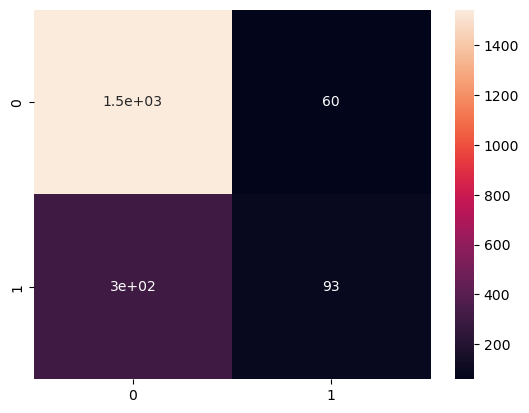

In [142]:
sns.heatmap(cm,annot=True)

In [143]:
from sklearn.metrics import classification_report 

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1602
           1       0.61      0.23      0.34       398

    accuracy                           0.82      2000
   macro avg       0.72      0.60      0.62      2000
weighted avg       0.79      0.82      0.78      2000

